# Module 3 Homework - Seaborn
Using a dataset about Pokemon combat statistic, we will practice data visualization using the seaborn library.  
<img src="https://cdn.arstechnica.net/wp-content/uploads/2020/07/pokemon-go-masks-800x450.jpg">

In this notebook, we will plot the relationships between different observations of the combat statistics of Pokémon. You will need to import a few packages, including `pandas`, `matplotlib.pyplot`, and `seaborn`. The data is stored in a csv file: https://raw.githubusercontent.com/csbfx/advpy122-data/master/Pokemon.csv

Here are the descriptions of this dataset:
- `#` - Pokedex entry number of the Pokemon
- `Name` - name of the Pokemon
- `Type 1` - each Pokemon has a type, this determines weakness/resistance to attacks [referred to as the primary type]
- `Type 2` - some Pokemon are dual type and have 2 [referred to as the secondary type]
- `Total` - sum of all stats that come after this, a general guide to how strong a Pokemon is
- `HP` - hit points, or health, defines how much damage a Pokemon can withstand before fainting
- `Attack` - the base modifier for normal attacks
- `Defense` - the base damage resistance against normal attacks
- `Sp. Atk` - special attack, the base modifier for special attacks
- `Sp. Def` - the base damage resistance against special attacks
- `Speed` - determines which Pokemon attacks first each round
- `Generation` - refers to which grouping/game series the Pokemon was released in
- `Legendary` - a boolean that identifies whether the Pokemon is legendary

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fp = "https://raw.githubusercontent.com/csbfx/advpy122-data/master/Pokemon.csv"

In [39]:
pokedata = pd.read_csv(fp)

In [40]:
pokedata.info()
pokedata.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


## Q1: Plot the relationship between Attack and Defense
Create a relationship plot using seaborn's `relplot` function. Plot `Attack` on the x-axis and `Defense` on the y-axis. Use `hue` to display the `HP` (hit point) for each datapoint. You can choose your favorite palette. Include a meaninful title in the plot. After creating the plot, insert a markdown cell :immediately following the plot to describe the relationship between Attack and Defense in this dataset.

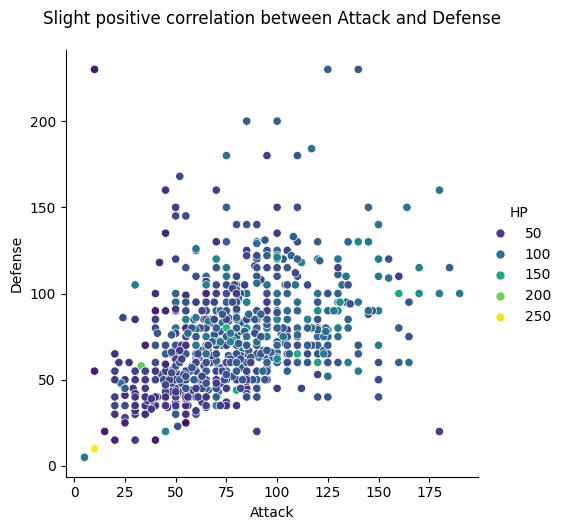

In [41]:
# Your code here . . .
attackdefenseplot = sns.relplot(
    data = pokedata,
    x = "Attack",
    y = "Defense",
    hue = "HP",
    palette = "viridis"
)

attackdefenseplot.fig.suptitle("Slight positive correlation between Attack and Defense", y = 1.05);

### From the plot, I observed....
There seems to be a slight positive correlation between attack and defense. The more attack a pokemon has, the more defense they will have in general. HP seems to decrease as defense and HP stats increase, but the colors don't show a strong trend.

## Q2: Plot the relationship between Attack and Total using a hexbin plot
Create a hexbin plot using seaborn's `joinplot` function. Plot `Attack` on the x-axis and `Total` on the y-axis. You can choose the gridsize. Include a title for the plot "Attack vs total for all Pokemon". After generating the plot, insert a markdown cell to answer this question: The hexbin plot displays the relationship between `Attack` and `Total`, what else does this plot show?

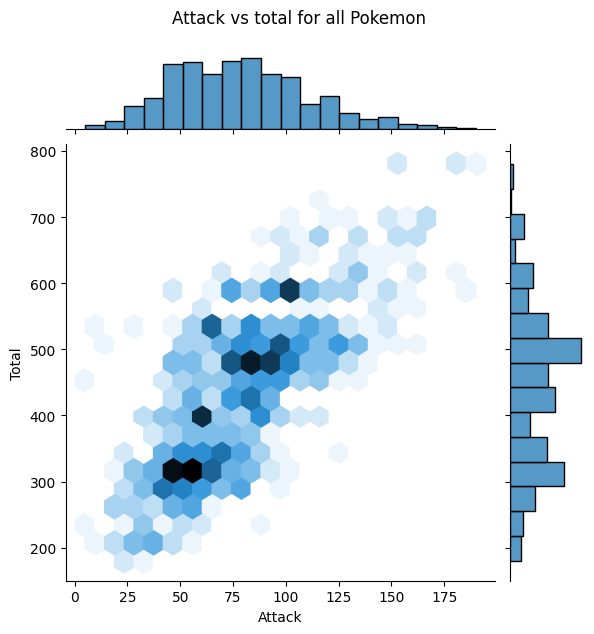

In [42]:
# Your code here . . .
attacktotalplot = sns.jointplot(
    data = pokedata,
    kind = 'hex',
    x = "Attack",
    y = "Total",
    gridsize = 20,
)

attacktotalplot.fig.suptitle("Attack vs total for all Pokemon", y=1.05);


From the plot, I observed that there seems to be a large concentration of data between 50 < Attack < 100 and 300 < Total < 600. The plot also shows that there is a strong positive relationship between Attack and Total. The are positively correlated.

## Q3: Create two categorical plots for Pokemon types. `Type 1` and `Type 2` .
For each plot, the unique values of `Type 1` or `Type 2` should be plotted along the y-axis, and the counts of Pokemon should be on the x-axis. Use the color red for the `Type 1` plot and blue for the `Type 2` plot. After the two plots are displayed, insert a markdown cell to write your findings: Which are the most common `Type 1` and `Type 2` Pokemons, and which are the most rare ones?

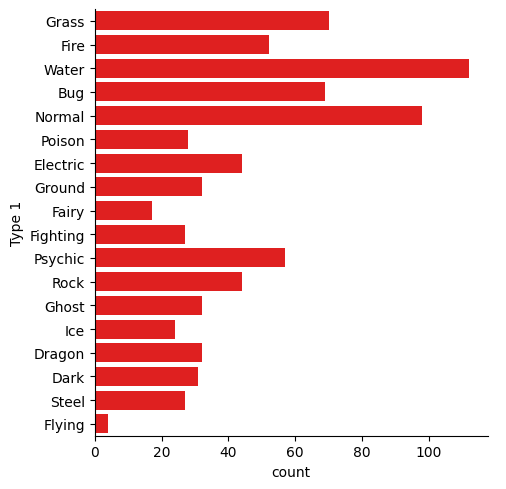

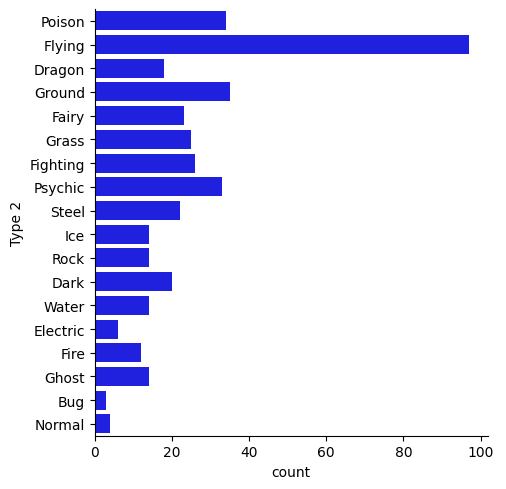

In [43]:
# Your code here . . .
type1plot = sns.catplot(
    y = 'Type 1',
    data = pokedata,
    kind = 'count',
    color = 'red'
)

type2plot = sns.catplot(
    y = 'Type 2',
    data = pokedata,
    kind = 'count',
    color = 'blue'
)

For Type 1, the most common types are Water, Grass, and Normal. The rarest are Flying, Fairy, and Ice.
For Type 2 Pokemon, the most common types are Flying (by a large margin), followed by Posion, Ground, and Psychic. The rarest types are Bug, Normal, and Electric.

## Q4-6: Your own question
Come up with three more questions to further explore the pokemon dataset.

###Q4 What is the relationship between Sp. Atk and Sp. Def for the Pokemon in the dataset? Does a linear equation or a quadratic equation capture this relationship better?

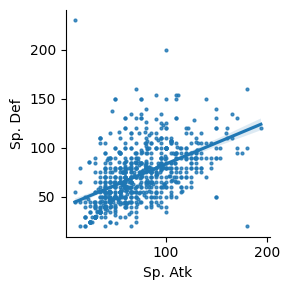

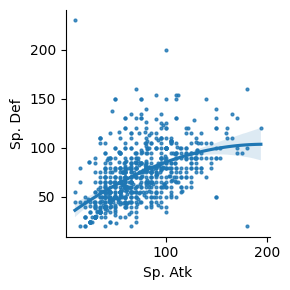

In [44]:
# Your code here . . .
sp_stats_plot_linear = sns.lmplot(
    data = pokedata,
    x = "Sp. Atk",
    y = "Sp. Def",
    order = 1,
    ci=90,
    scatter_kws = {'s':4},
    height = 3
)

sp_stats_plot_quadratic = sns.lmplot(
    data = pokedata,
    x = "Sp. Atk",
    y = "Sp. Def",
    order = 2,
    ci=90,
    scatter_kws = {'s':4},
    height = 3
)

There seems to be a slight positive relationship between Sp. Atk and Sp. Def. Although both lines portray the data accurately, it seems that the quadratic equation is a better fit for the data points on the right hand side of the graph.

###Q5: What are all the different generations of Pokemon? Which generation has the highest number of pokemon? Which has the lowest?

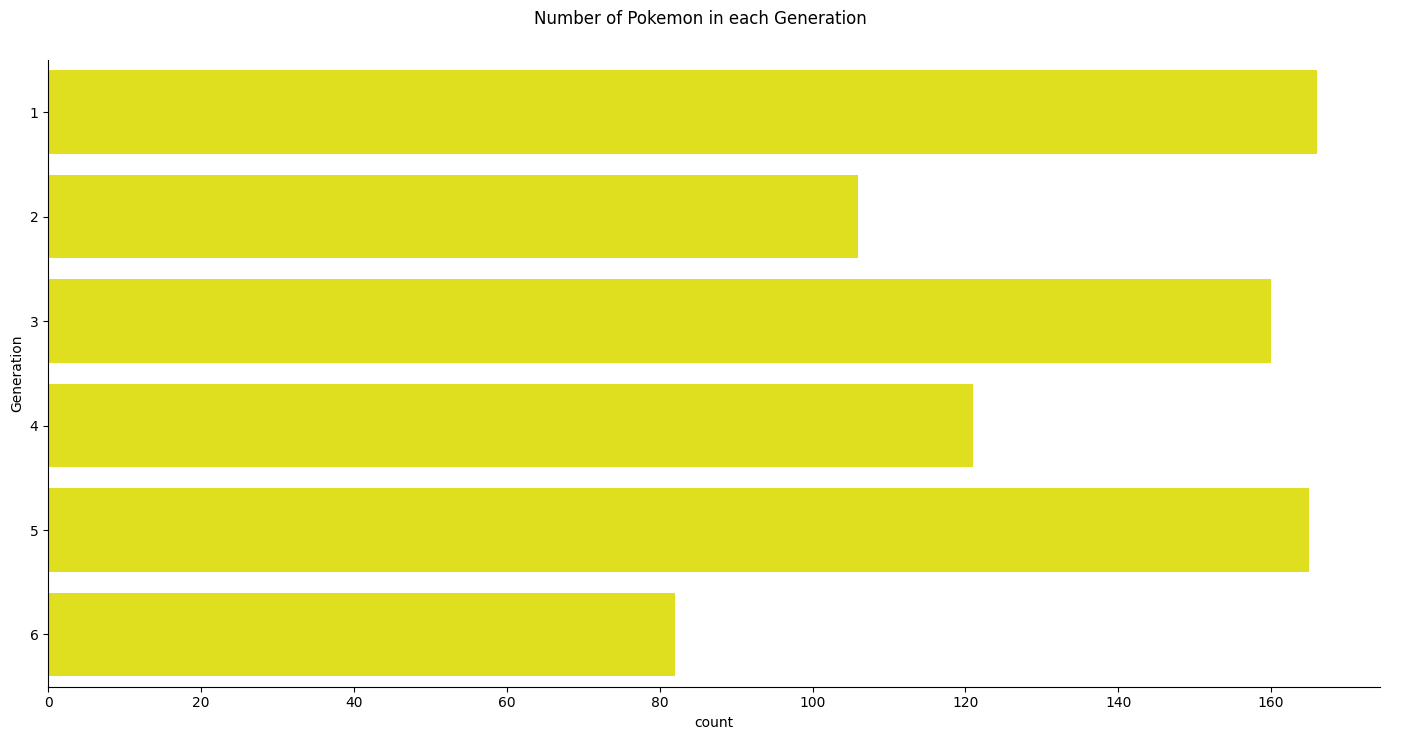

In [45]:
gen_plot = sns.catplot(
  data = pokedata,
  y = "Generation",
  kind = 'count',
  color = 'yellow',
  height = 7,
  aspect = 2 #i added height and aspect because I couldn't see if 1 or 5 was the largest at first
)

gen_plot.fig.suptitle("Number of Pokemon in each Generation", y=1.05);

There are 6 generations, called merely by the number. Generation 1 has the most amount of Pokemon, while Generation 6 has the least amount of Pokemon.

###Q6: Do certain generations have stronger Pokemon? And do Legendary Pokemon have higher stats in general (will compare using the total stat).


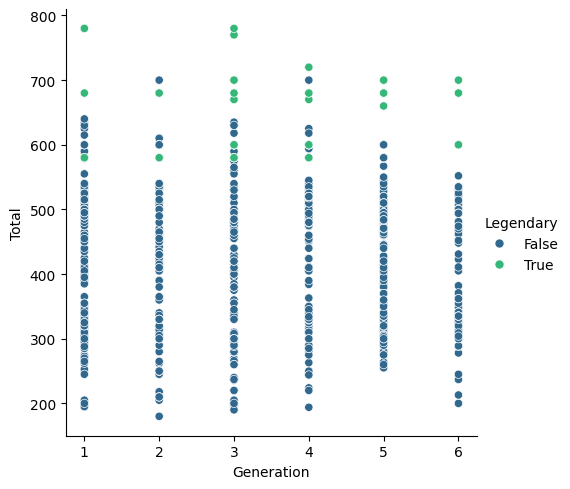

In [46]:
leg_stat_plot = sns.relplot(
    data = pokedata,
    x = "Generation",
    y = "Total",
    hue = "Legendary",
    palette="viridis"
)

Each generation seems to have an equal distribution of strong and weak pokemon (shown from the total stats). Legendary Pokemon tend to have higher total stats. The colors of the data points indicate that legendary pokemon only have total stats higher than 550, meaning that they are stronger than normal Pokemon on average.